In [18]:
# !pip install lightgbm

In [19]:
#All Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from scipy.stats import skew

In [3]:
#Loading Data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
test_ids = test['id']

In [4]:
#Data Preprocessing
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [5]:
#Exploratory Data Analysis
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [6]:
train.tail()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
249995,0.923980,6,0.663212,-0.055120,6.61768,1.26619,40.44790,0.852375,25.5224,1.12294,...,3517.9700,18.5342,1.41936,0.607504,4.950780,2.85342,0.961882,1.068010,1.437650,11
249996,0.243556,7,-0.557062,1.333470,-54.88610,17.58310,212.96400,-1.204750,-128.3850,1.19334,...,1945.8100,19.4822,1.60072,-0.154877,5.693280,1.99454,0.760925,1.427880,1.226720,5
249997,0.046023,53,0.462863,0.704034,2062.94000,14.58160,11.42710,-0.509812,80.8180,1.20383,...,-28.4689,11.0082,1.61080,-0.350927,27.986900,1.01269,0.830533,1.005470,0.455332,1
249998,0.977330,12,-1.002880,0.576377,4741.16000,11.10090,3.81546,0.616191,118.9020,1.50424,...,-275.5370,21.9857,3.16051,0.772058,2.592220,3.93826,0.697430,0.962347,7.415890,10
249999,0.244233,51,0.729304,-0.702592,197.46200,19.02400,42.33370,0.465181,-115.3980,1.13675,...,5387.2500,38.5746,3.61783,-0.544969,-0.987695,1.87191,0.452516,0.935411,28.912200,7


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 101 entries, f0 to loss
dtypes: float64(95), int64(6)
memory usage: 192.6 MB


In [8]:
train.nunique()

f0      223000
f1         289
f2      232906
f3      225458
f4      235741
         ...  
f96     168844
f97     215966
f98     148285
f99     213501
loss        43
Length: 101, dtype: int64

In [9]:
train.isnull().sum()

f0      0
f1      0
f2      0
f3      0
f4      0
       ..
f96     0
f97     0
f98     0
f99     0
loss    0
Length: 101, dtype: int64

In [10]:
train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,1.190382,...,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,0.099700,...,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,0.934037,...,-12695.700000,-4.059170,0.057800,-1.998800,-24.686300,-1.131980,0.005249,-0.646967,-0.842397,0.000000
25%,0.251287,18.000000,-0.611172,-0.719418,163.864750,4.110127,27.894900,-0.026245,-17.392025,1.132640,...,73.203100,11.525450,1.471650,-0.408975,-4.004925,1.906718,0.359646,1.215810,3.732800,1.000000
50%,0.514962,41.000000,0.253815,0.004099,943.000500,7.472445,91.005250,0.619862,8.714945,1.170370,...,1060.025000,19.993200,1.660830,0.215710,0.759942,2.340430,0.531348,1.451285,7.182205,4.000000
75%,0.777322,75.000000,0.759249,0.765456,4115.355000,11.030950,240.843750,0.933855,55.407625,1.218880,...,5572.982500,32.271625,2.320085,0.503134,6.202503,2.910020,0.709807,1.901632,10.998550,10.000000
max,1.072070,273.000000,9.768590,1.680190,37847.500000,35.078000,947.143000,4.010380,465.956000,1.712450,...,54334.600000,79.912400,5.403020,1.944190,42.890400,5.576040,1.105400,4.492620,34.019200,42.000000


In [11]:
#Training the Model
y = train['loss']
X = train.drop('loss', axis=1)

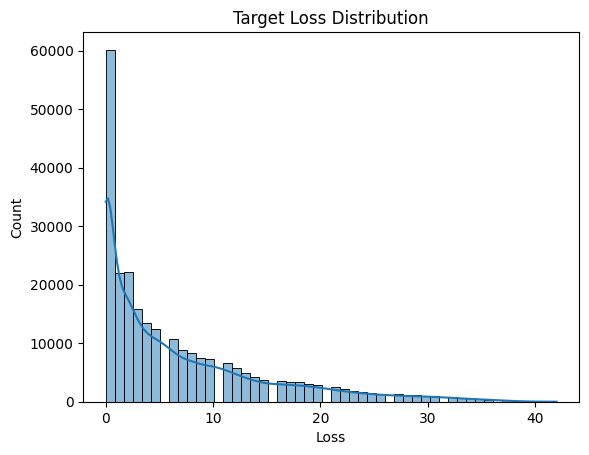

In [12]:
sns.histplot(y, kde=True, bins=50)
plt.title("Target Loss Distribution")
plt.xlabel("Loss")
plt.show()

In [13]:
print("Skewness:", skew(y))

Skewness: 1.4653103446074542


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [20]:
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    n_jobs=-1,
    random_state=42
)

In [43]:
model.fit(X_train, y_train_log)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25498
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 100
[LightGBM] [Info] Start training from score 1.509938


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [44]:
X_preds = np.expm1(model.predict(X_val))

In [45]:
mse = mean_squared_error(y_val_log, X_preds)
rmse = np.sqrt(mse)
print(f"Target loss range: {y_val_log.min()} to {y_val_log.max()}")
print(f"Target loss std dev: {y_val_log.std():.4f}")
print(f"RMSE: {rmse:.4f}")

Target loss range: 0.0 to 3.7612001156935624
Target loss std dev: 1.1065
RMSE: 2.4610


In [37]:
sub_pred = np.expm1(model.predict(test))

In [32]:
df = pd.DataFrame({'id': test_ids.values,
                   'loss': sub_pred,
                  })
df.to_csv('../submission/submission.csv', index=False)

In [31]:
print('✅ Done')

✅ Done
